In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
train_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra'
test_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tes'

data = pd.read_csv(train_data_url, header=None)
data_test = pd.read_csv(test_data_url, header=None)

# Separate features and labels
X_train = data.iloc[:, :-1]
y_train = data.iloc[:, -1]
X_test = data_test.iloc[:, :-1]
y_test = data_test.iloc[:, -1]

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_model(layers, activation, initializer):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_dim=X_train.shape[1], activation=activation, kernel_initializer=initializer))
        else:
            model.add(Dense(nodes, activation=activation, kernel_initializer=initializer))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [11]:
!pip install kaggle

In [12]:
import matplotlib.pyplot as plt

def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=50):
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    return history, accuracy

def plot_accuracy(history, title):
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def train_evaluate_and_plot(model, X_train, y_train, X_test, y_test, title, epochs=50):
    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)
    y_pred = np.argmax(model.predict(X_test), axis=1)
    plot_heatmap(y_test, y_pred, title)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    return accuracy


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_heatmap(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

110/110 [==============================] - 0s 2ms/step


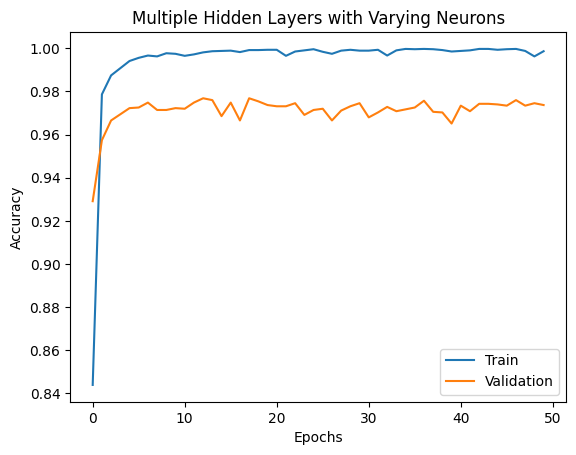

Accuracy: 0.9736992567181246


In [14]:
layers = [64, 64, 32]
activation = 'relu'
initializer = 'he_normal'

model = create_model(layers, activation, initializer)
history, accuracy = train_and_evaluate(model, X_train, y_train, X_test, y_test)
plot_accuracy(history, 'Multiple Hidden Layers with Varying Neurons')
print(f'Accuracy: {accuracy}')


110/110 [==============================] - 0s 2ms/step


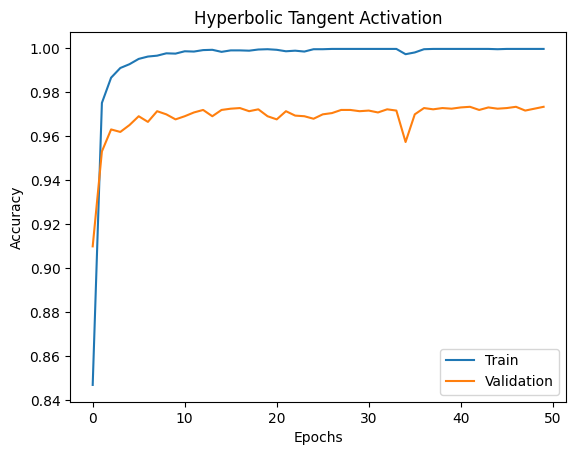

Accuracy (Tanh): 0.9734133790737565
110/110 [==============================] - 0s 2ms/step


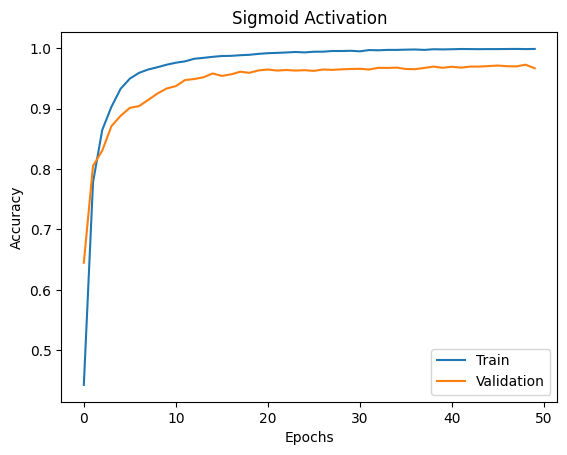

Accuracy (Sigmoid): 0.9668381932532876


In [15]:
# Hyperbolic Tangent activation
activation = 'tanh'
model = create_model(layers, activation, initializer)
history, accuracy = train_and_evaluate(model, X_train, y_train, X_test, y_test)
plot_accuracy(history, 'Hyperbolic Tangent Activation')
print(f'Accuracy (Tanh): {accuracy}')

# Sigmoid activation
activation = 'sigmoid'
model = create_model(layers, activation, initializer)
history, accuracy = train_and_evaluate(model, X_train, y_train, X_test, y_test)
plot_accuracy(history, 'Sigmoid Activation')
print(f'Accuracy (Sigmoid): {accuracy}')


110/110 [==============================] - 0s 1ms/step


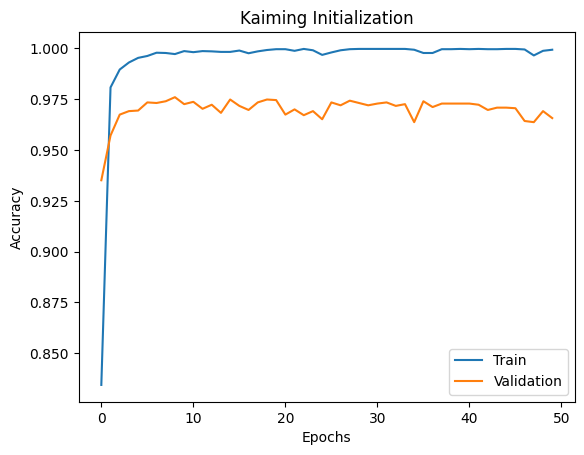

Accuracy (Kaiming): 0.9656946826758147
110/110 [==============================] - 0s 2ms/step


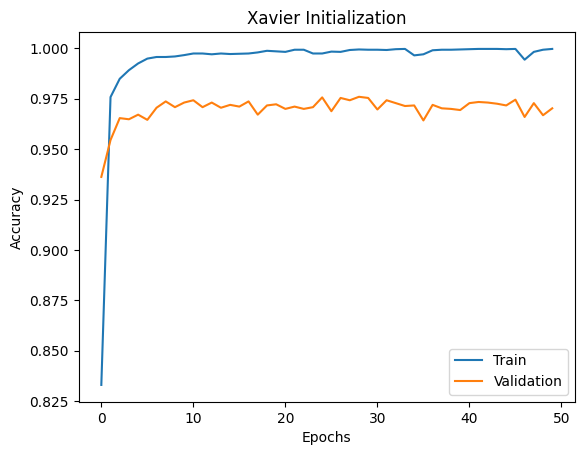

Accuracy (Xavier): 0.9702687249857062
110/110 [==============================] - 0s 3ms/step


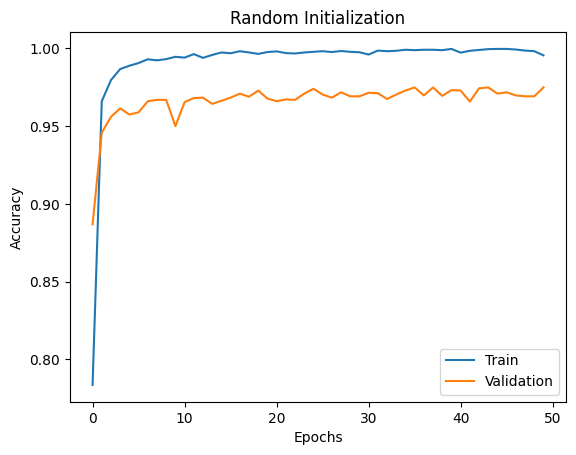

Accuracy (Random): 0.9748427672955975


In [16]:
# Kaiming initialization
initializer = 'he_normal'
model = create_model(layers, 'relu', initializer)
history, accuracy = train_and_evaluate(model, X_train, y_train, X_test, y_test)
plot_accuracy(history, 'Kaiming Initialization')
print(f'Accuracy (Kaiming): {accuracy}')

# Xavier initialization
initializer = 'glorot_normal'
model = create_model(layers, 'relu', initializer)
history, accuracy = train_and_evaluate(model, X_train, y_train, X_test, y_test)
plot_accuracy(history, 'Xavier Initialization')
print(f'Accuracy (Xavier): {accuracy}')

# Random initialization
initializer = 'random_normal'
model = create_model(layers, 'relu', initializer)
history, accuracy = train_and_evaluate(model, X_train, y_train, X_test, y_test)
plot_accuracy(history, 'Random Initialization')
print(f'Accuracy (Random): {accuracy}')


110/110 [==============================] - 0s 2ms/step


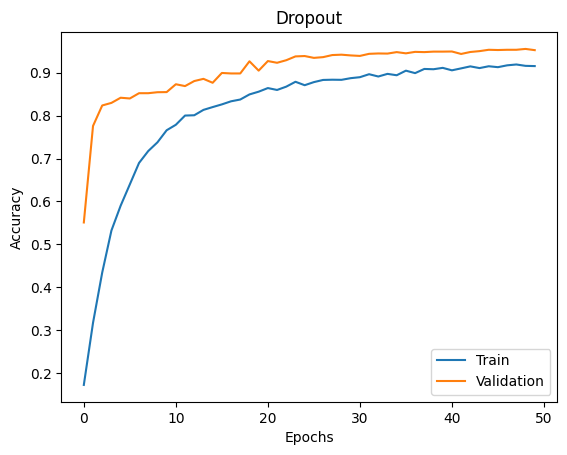

Accuracy (Dropout): 0.952544311034877


In [17]:
def create_model_with_dropout(layers, activation, initializer, dropout_rate):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_dim=X_train.shape[1], activation=activation, kernel_initializer=initializer))
            model.add(Dropout(dropout_rate))
        else:
            model.add(Dense(nodes, activation=activation, kernel_initializer=initializer))
            model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Dropout
dropout_rate = 0.5
model = create_model_with_dropout(layers, 'relu', 'he_normal', dropout_rate)
history, accuracy = train_and_evaluate(model, X_train, y_train, X_test, y_test)
plot_accuracy(history, 'Dropout')
print(f'Accuracy (Dropout): {accuracy}')


110/110 [==============================] - 0s 1ms/step


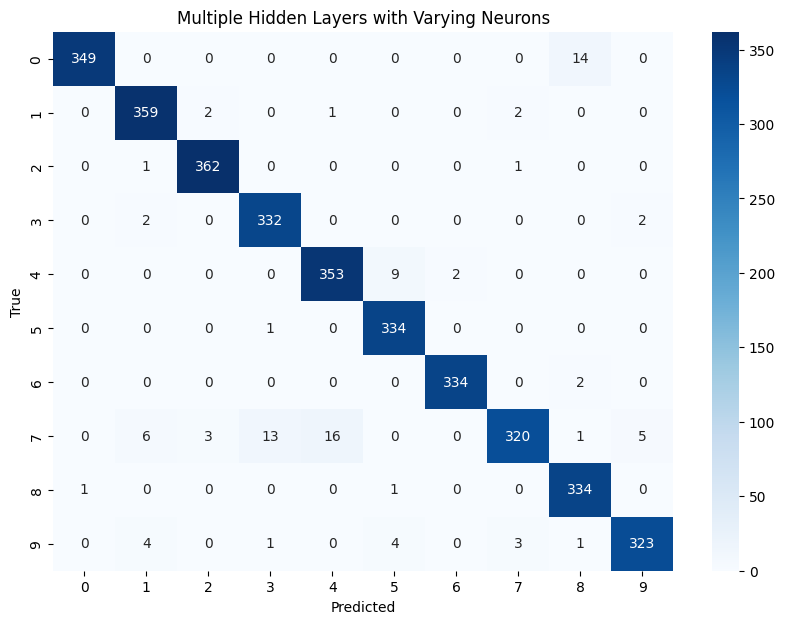

Accuracy: 0.9719839908519153
110/110 [==============================] - 0s 1ms/step


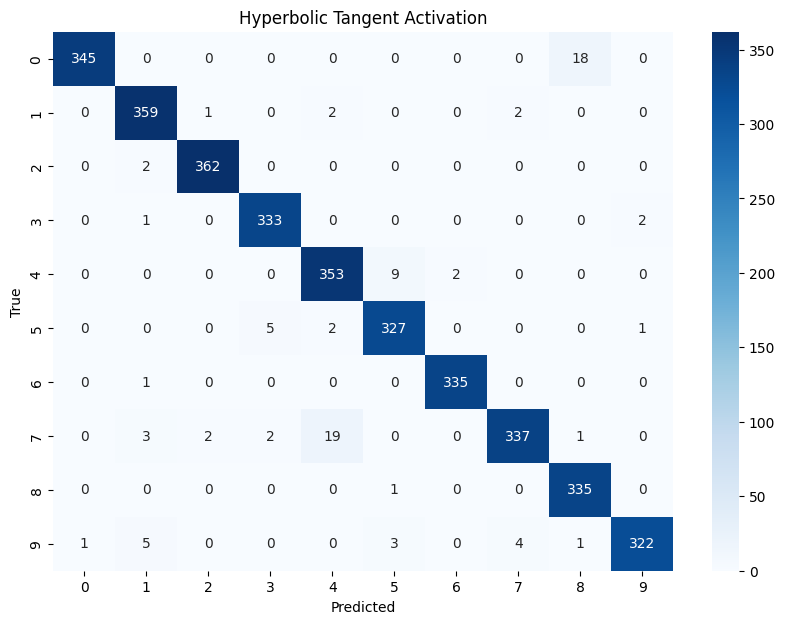

Accuracy: 0.9742710120068611
110/110 [==============================] - 0s 1ms/step


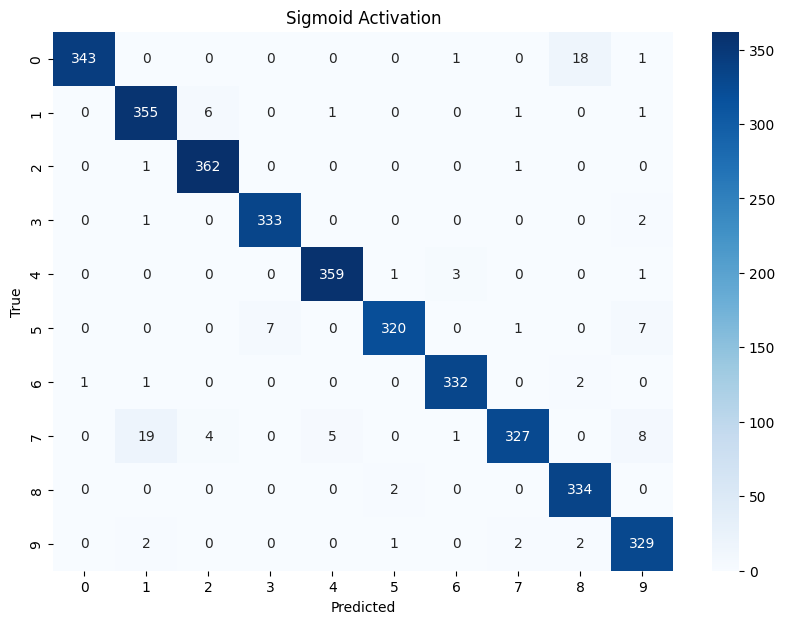

Accuracy: 0.9702687249857062
110/110 [==============================] - 0s 2ms/step


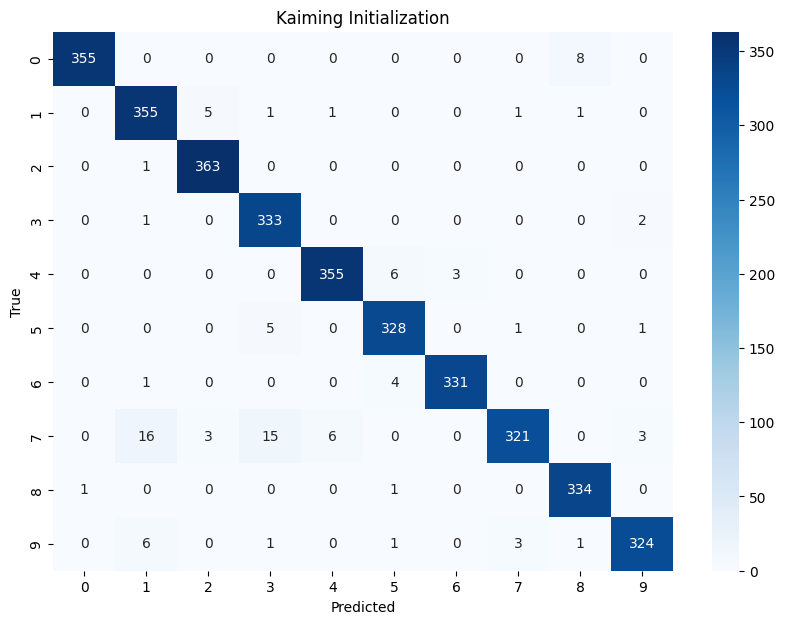

Accuracy: 0.9716981132075472
110/110 [==============================] - 0s 1ms/step


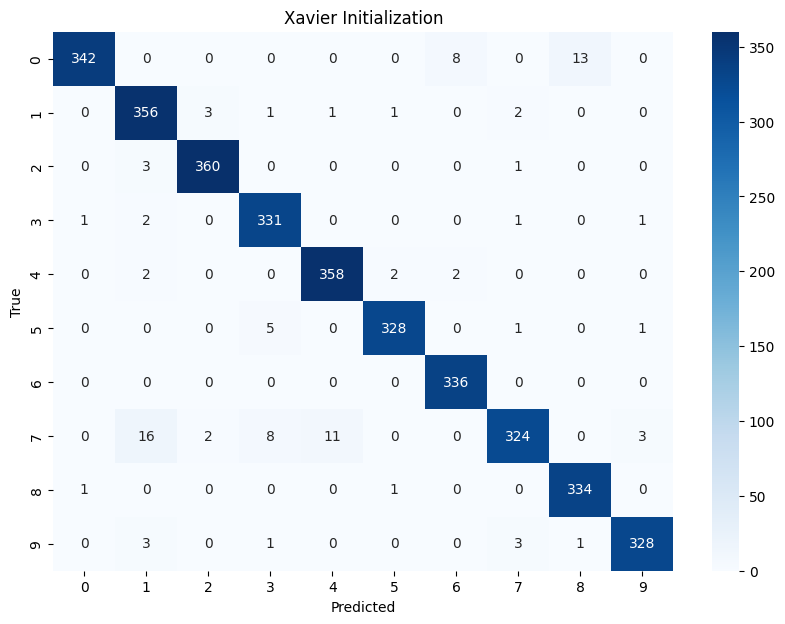

Accuracy: 0.9711263579188107
110/110 [==============================] - 0s 1ms/step


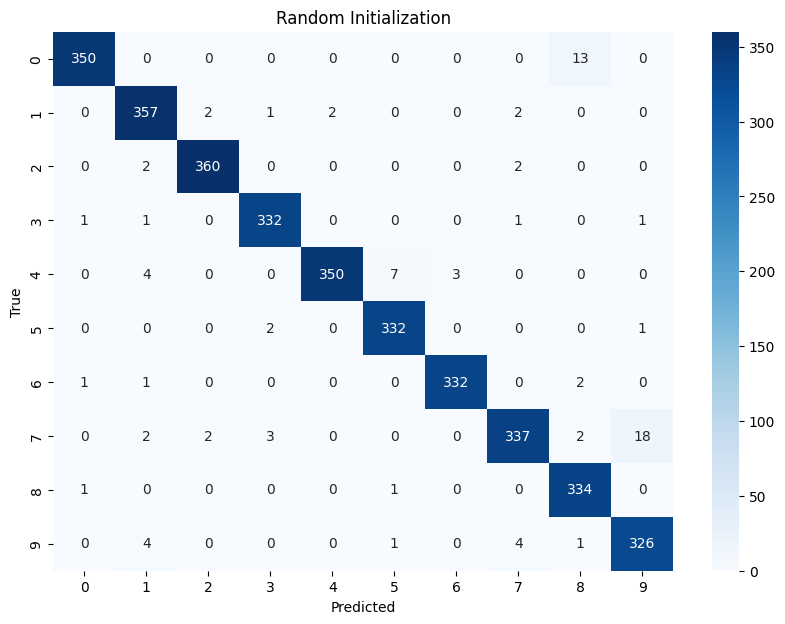

Accuracy: 0.9748427672955975
110/110 [==============================] - 0s 2ms/step


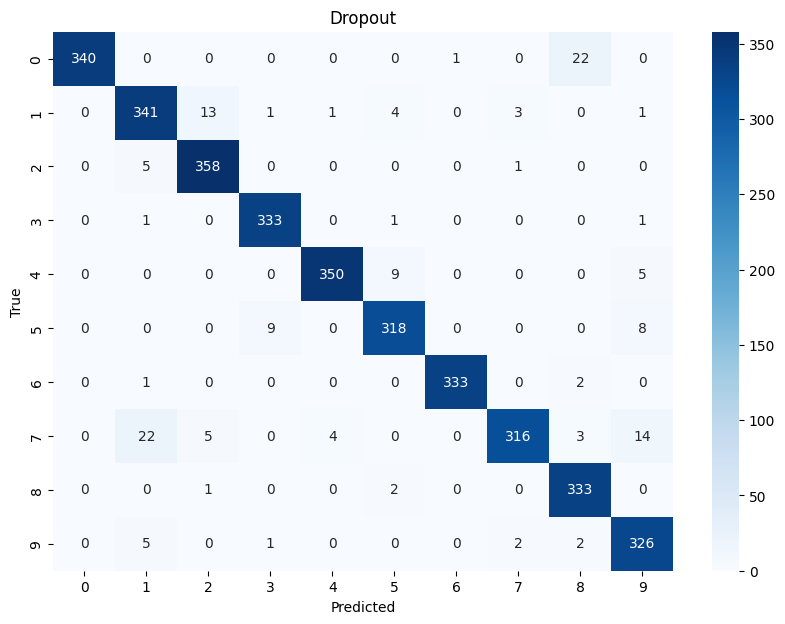

Accuracy: 0.9571183533447685


In [18]:
# Multiple Hidden Layers with Varying Neurons
model = create_model([64, 64, 32], 'relu', 'he_normal')
accuracy = train_evaluate_and_plot(model, X_train, y_train, X_test, y_test, 'Multiple Hidden Layers with Varying Neurons')

# Hyperbolic Tangent Activation
model = create_model([64, 64, 32], 'tanh', 'he_normal')
accuracy = train_evaluate_and_plot(model, X_train, y_train, X_test, y_test, 'Hyperbolic Tangent Activation')

# Sigmoid Activation
model = create_model([64, 64, 32], 'sigmoid', 'he_normal')
accuracy = train_evaluate_and_plot(model, X_train, y_train, X_test, y_test, 'Sigmoid Activation')

# Kaiming Initialization
model = create_model([64, 64, 32], 'relu', 'he_normal')
accuracy = train_evaluate_and_plot(model, X_train, y_train, X_test, y_test, 'Kaiming Initialization')

# Xavier Initialization
model = create_model([64, 64, 32], 'relu', 'glorot_normal')
accuracy = train_evaluate_and_plot(model, X_train, y_train, X_test, y_test, 'Xavier Initialization')

# Random Initialization
model = create_model([64, 64, 32], 'relu', 'random_normal')
accuracy = train_evaluate_and_plot(model, X_train, y_train, X_test, y_test, 'Random Initialization')

# Dropout
model = create_model_with_dropout([64, 64, 32], 'relu', 'he_normal', 0.5)
accuracy = train_evaluate_and_plot(model, X_train, y_train, X_test, y_test, 'Dropout')


In [19]:
def create_model(layers, activation, initializer):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_dim=X_train.shape[1], activation=activation, kernel_initializer=initializer))
        else:
            model.add(Dense(nodes, activation=activation, kernel_initializer=initializer))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [20]:
# Train, evaluate, and plot heatmap function
def train_evaluate_and_plot(model, X_train, y_train, X_test, y_test, title, epochs=50):
    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)
    y_pred = np.argmax(model.predict(X_test), axis=1)
    plot_heatmap(y_test, y_pred, title)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    return accuracy

# Function to plot heatmap
def plot_heatmap(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()


110/110 [==============================] - 0s 1ms/step


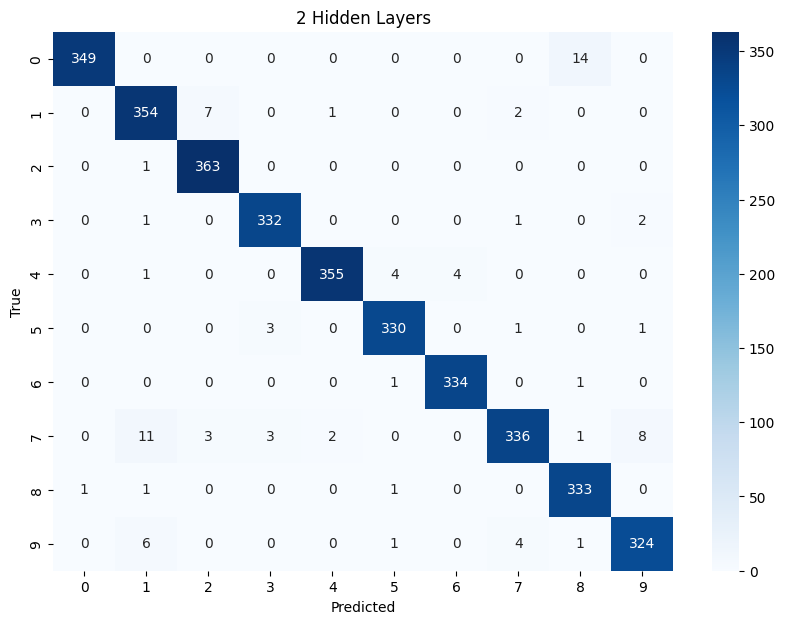

Accuracy: 0.9748427672955975
110/110 [==============================] - 0s 2ms/step


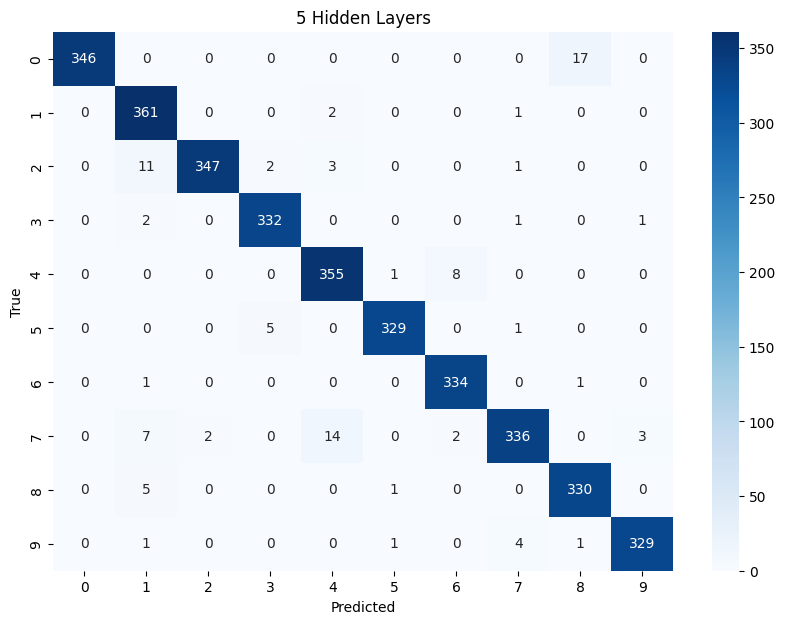

Accuracy: 0.9716981132075472


In [21]:
# Model with 2 layers
layers_2 = [64, 32]
activation = 'relu'
initializer = 'he_normal'

model_2_layers = create_model(layers_2, activation, initializer)
accuracy_2_layers = train_evaluate_and_plot(model_2_layers, X_train, y_train, X_test, y_test, '2 Hidden Layers')

# Model with 5 layers
layers_5 = [64, 64, 64, 32, 32]
activation = 'relu'
initializer = 'he_normal'

model_5_layers = create_model(layers_5, activation, initializer)
accuracy_5_layers = train_evaluate_and_plot(model_5_layers, X_train, y_train, X_test, y_test, '5 Hidden Layers')


110/110 [==============================] - 0s 1ms/step


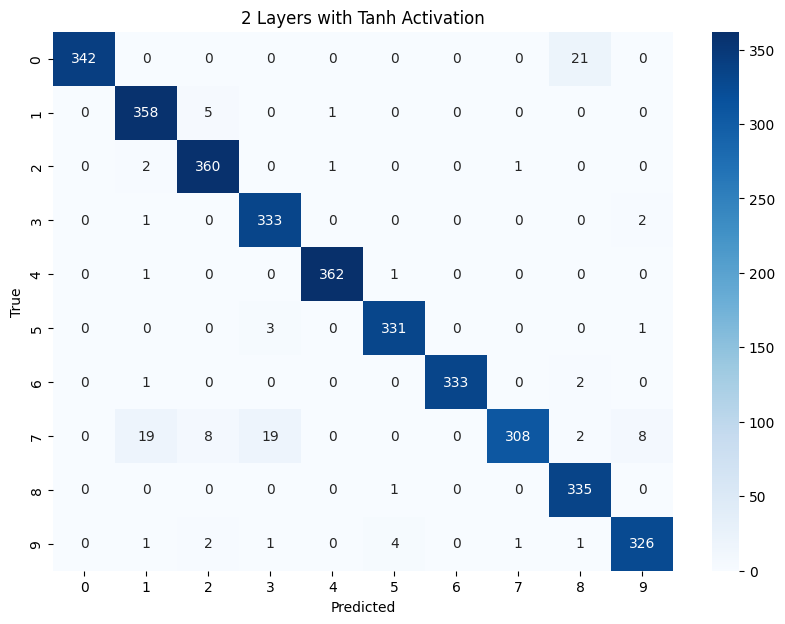

Accuracy: 0.9685534591194969
110/110 [==============================] - 0s 1ms/step


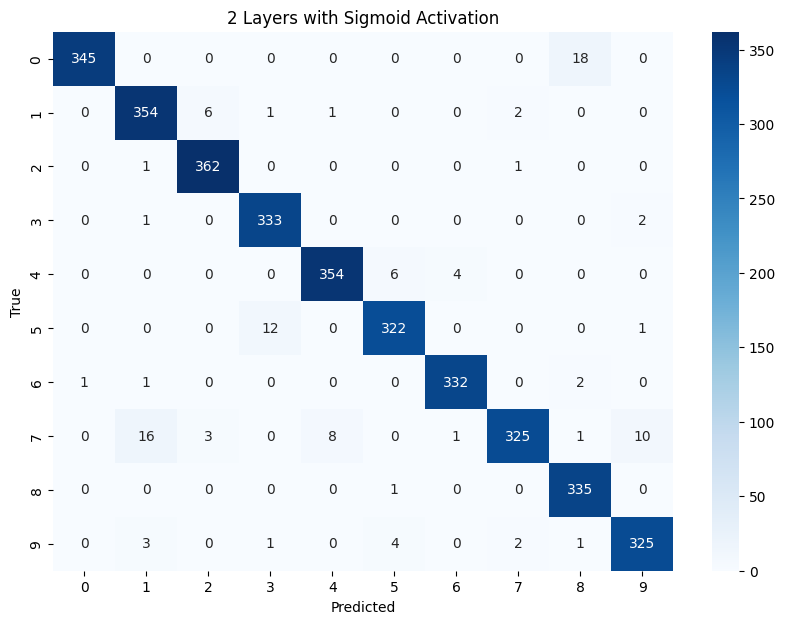

Accuracy: 0.9682675814751286
110/110 [==============================] - 0s 1ms/step


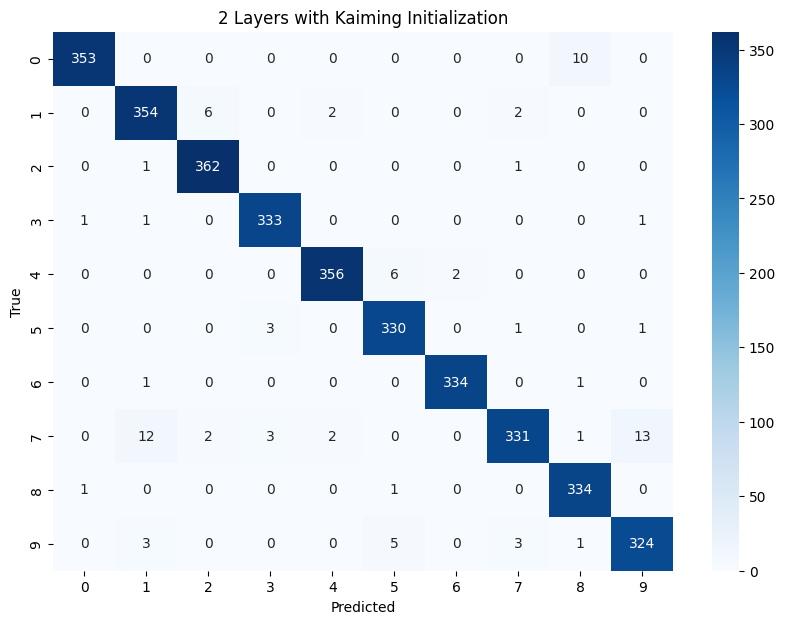

Accuracy: 0.9751286449399656
110/110 [==============================] - 0s 1ms/step


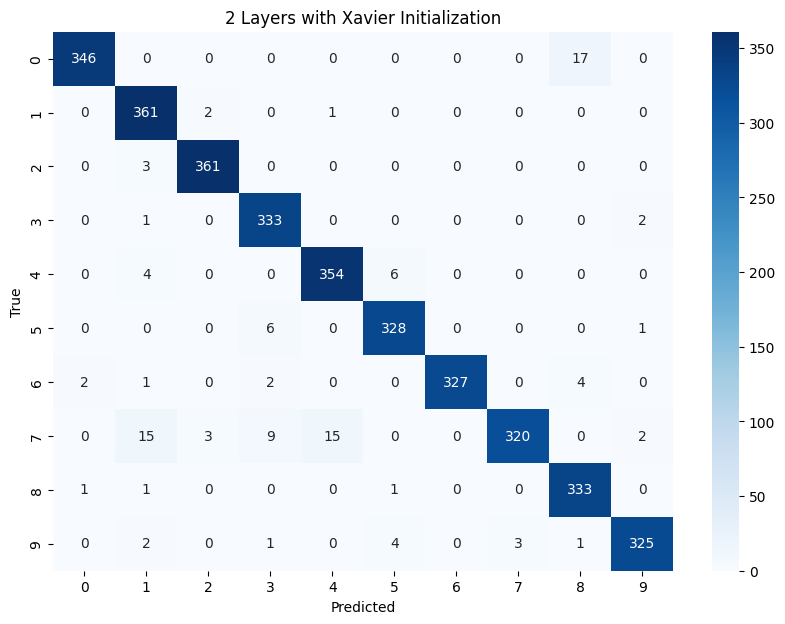

Accuracy: 0.9685534591194969
110/110 [==============================] - 0s 1ms/step


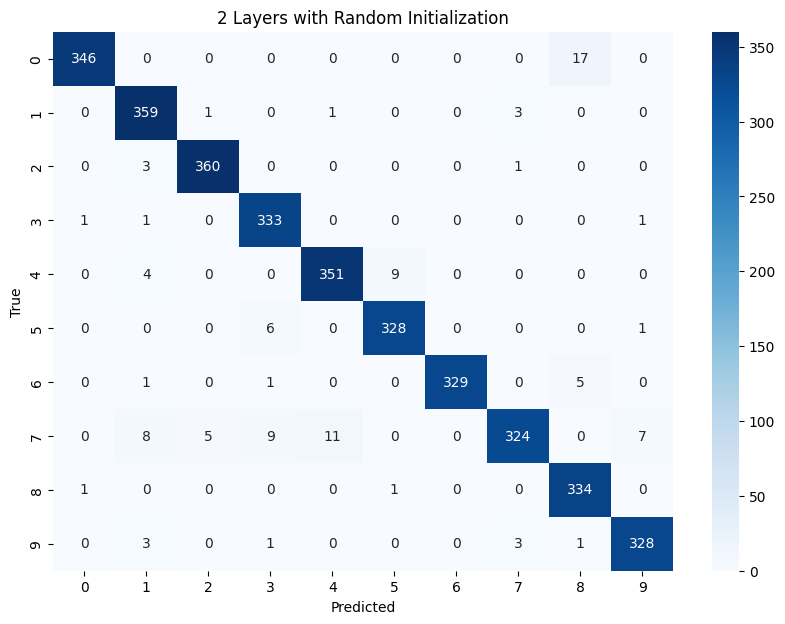

Accuracy: 0.9696969696969697
110/110 [==============================] - 0s 2ms/step


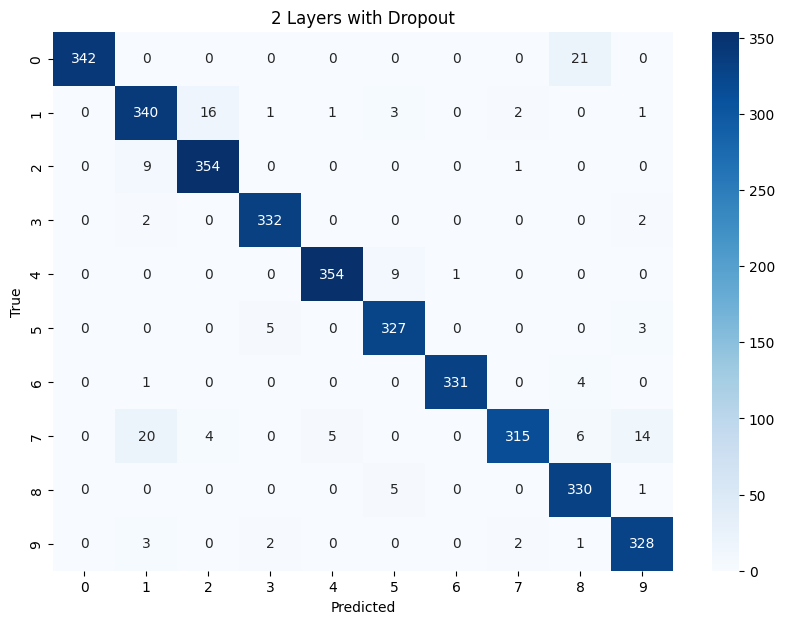

Accuracy: 0.9585477415666095


In [22]:
# Hyperbolic Tangent Activation for 2 layers
model_tanh_2_layers = create_model(layers_2, 'tanh', initializer)
accuracy_tanh_2_layers = train_evaluate_and_plot(model_tanh_2_layers, X_train, y_train, X_test, y_test, '2 Layers with Tanh Activation')

# Sigmoid Activation for 2 layers
model_sigmoid_2_layers = create_model(layers_2, 'sigmoid', initializer)
accuracy_sigmoid_2_layers = train_evaluate_and_plot(model_sigmoid_2_layers, X_train, y_train, X_test, y_test, '2 Layers with Sigmoid Activation')

# Kaiming Initialization for 2 layers
model_kaiming_2_layers = create_model(layers_2, 'relu', 'he_normal')
accuracy_kaiming_2_layers = train_evaluate_and_plot(model_kaiming_2_layers, X_train, y_train, X_test, y_test, '2 Layers with Kaiming Initialization')

# Xavier Initialization for 2 layers
model_xavier_2_layers = create_model(layers_2, 'relu', 'glorot_normal')
accuracy_xavier_2_layers = train_evaluate_and_plot(model_xavier_2_layers, X_train, y_train, X_test, y_test, '2 Layers with Xavier Initialization')

# Random Initialization for 2 layers
model_random_2_layers = create_model(layers_2, 'relu', 'random_normal')
accuracy_random_2_layers = train_evaluate_and_plot(model_random_2_layers, X_train, y_train, X_test, y_test, '2 Layers with Random Initialization')

# Dropout for 2 layers
def create_model_with_dropout(layers, activation, initializer, dropout_rate):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, input_dim=X_train.shape[1], activation=activation, kernel_initializer=initializer))
            model.add(Dropout(dropout_rate))
        else:
            model.add(Dense(nodes, activation=activation, kernel_initializer=initializer))
            model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

dropout_rate = 0.5
model_dropout_2_layers = create_model_with_dropout(layers_2, 'relu', 'he_normal', dropout_rate)
accuracy_dropout_2_layers = train_evaluate_and_plot(model_dropout_2_layers, X_train, y_train, X_test, y_test, '2 Layers with Dropout')


110/110 [==============================] - 0s 2ms/step


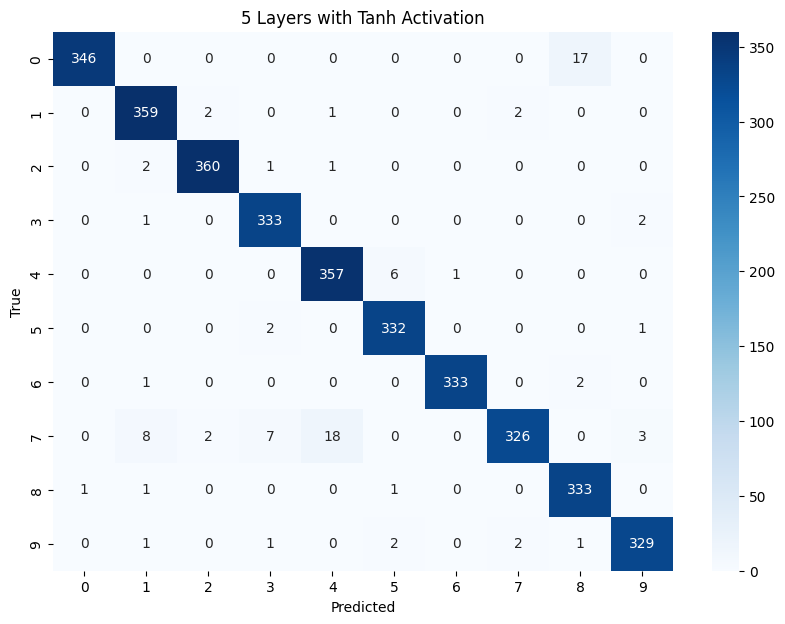

Accuracy: 0.9742710120068611
110/110 [==============================] - 0s 1ms/step


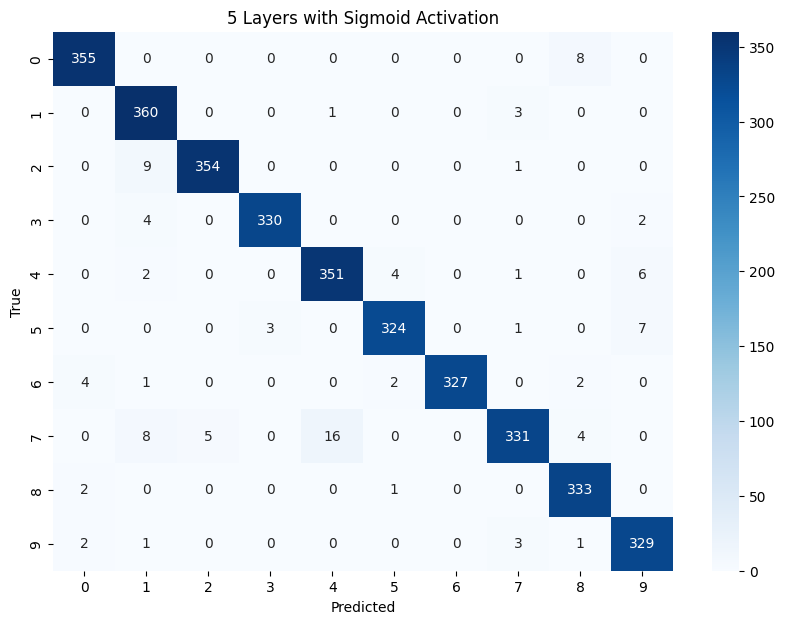

Accuracy: 0.9702687249857062
110/110 [==============================] - 0s 2ms/step


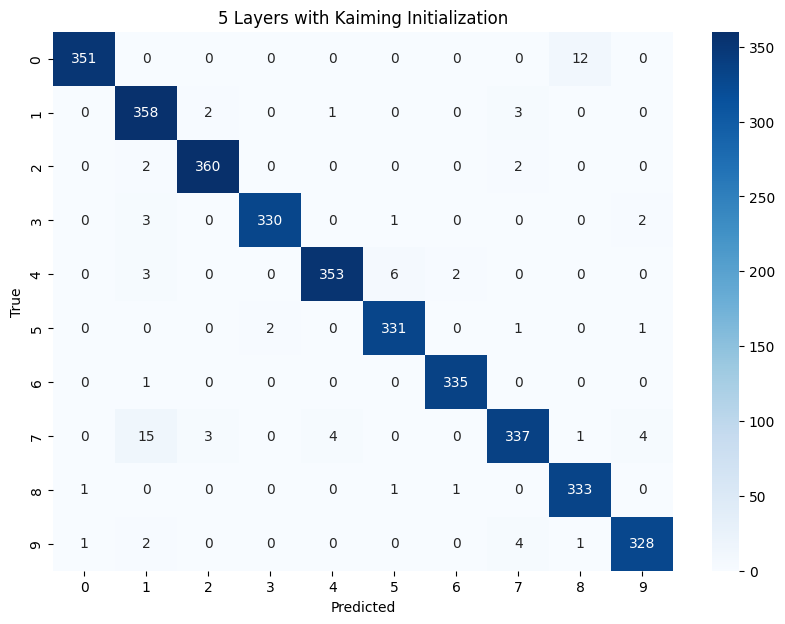

Accuracy: 0.9765580331618068
110/110 [==============================] - 0s 1ms/step


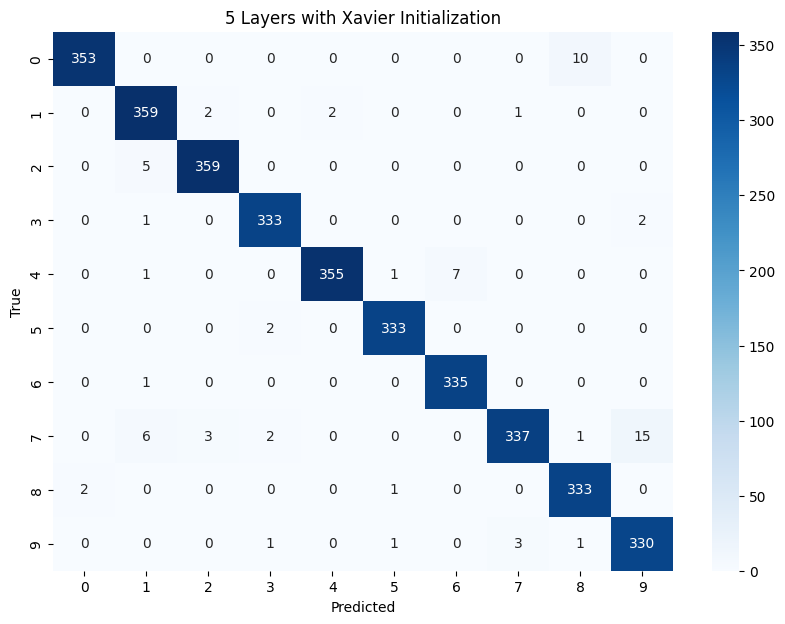

Accuracy: 0.9797026872498571
110/110 [==============================] - 0s 2ms/step


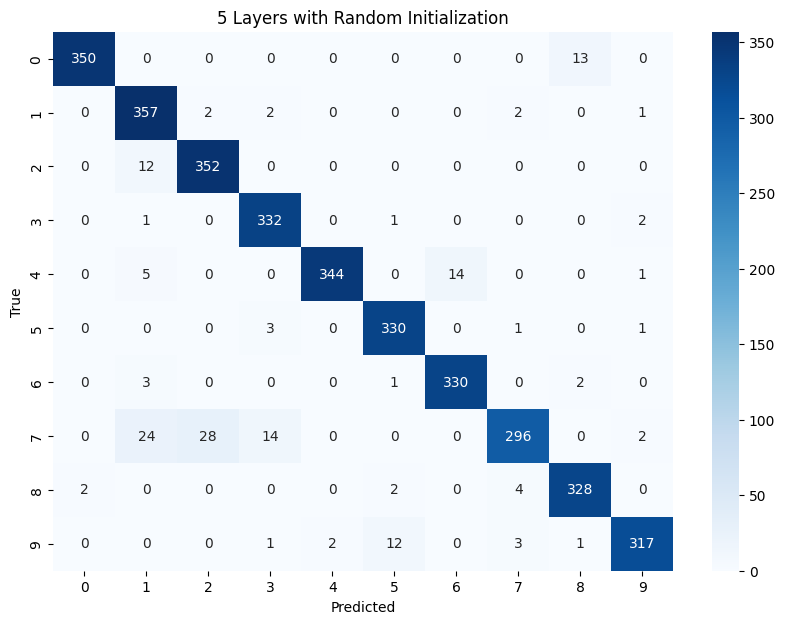

Accuracy: 0.9536878216123499
110/110 [==============================] - 0s 2ms/step


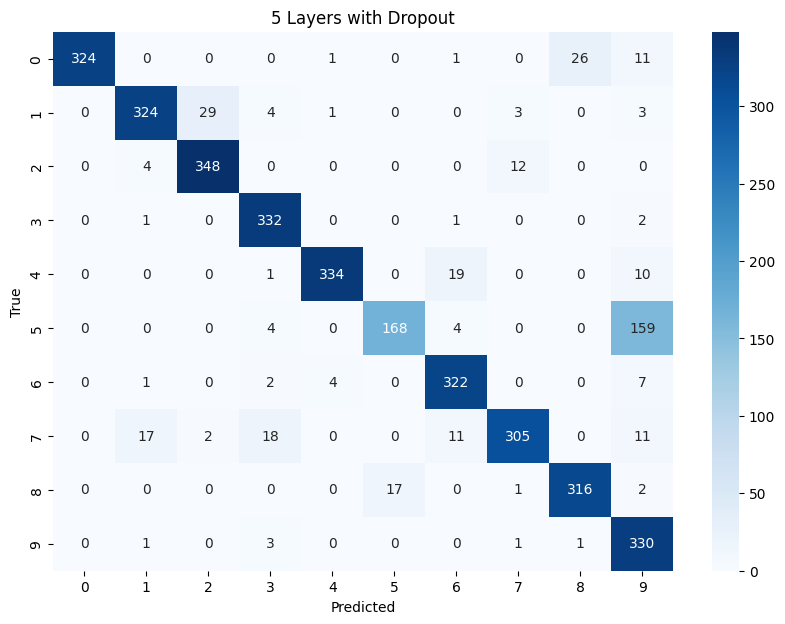

Accuracy: 0.8870783304745569


In [23]:
# Hyperbolic Tangent Activation for 5 layers
model_tanh_5_layers = create_model(layers_5, 'tanh', initializer)
accuracy_tanh_5_layers = train_evaluate_and_plot(model_tanh_5_layers, X_train, y_train, X_test, y_test, '5 Layers with Tanh Activation')

# Sigmoid Activation for 5 layers
model_sigmoid_5_layers = create_model(layers_5, 'sigmoid', initializer)
accuracy_sigmoid_5_layers = train_evaluate_and_plot(model_sigmoid_5_layers, X_train, y_train, X_test, y_test, '5 Layers with Sigmoid Activation')

# Kaiming Initialization for 5 layers
model_kaiming_5_layers = create_model(layers_5, 'relu', 'he_normal')
accuracy_kaiming_5_layers = train_evaluate_and_plot(model_kaiming_5_layers, X_train, y_train, X_test, y_test, '5 Layers with Kaiming Initialization')

# Xavier Initialization for 5 layers
model_xavier_5_layers = create_model(layers_5, 'relu', 'glorot_normal')
accuracy_xavier_5_layers = train_evaluate_and_plot(model_xavier_5_layers, X_train, y_train, X_test, y_test, '5 Layers with Xavier Initialization')

# Random Initialization for 5 layers
model_random_5_layers = create_model(layers_5, 'relu', 'random_normal')
accuracy_random_5_layers = train_evaluate_and_plot(model_random_5_layers, X_train, y_train, X_test, y_test, '5 Layers with Random Initialization')

# Dropout for 5 layers
dropout_rate = 0.5
model_dropout_5_layers = create_model_with_dropout(layers_5, 'relu', 'he_normal', dropout_rate)
accuracy_dropout_5_layers = train_evaluate_and_plot(model_dropout_5_layers, X_train, y_train, X_test, y_test, '5 Layers with Dropout')